Rendy Ananta Kristanto / 71220840

Leif Sean Kusumo / 71220915

Sanjaya Cahyadi Fuad / 71220965

[TI0263] KECERDASAN BUATAN GRUP A

In [2]:
import json
import datetime
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score


In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

Sumber data dari: https://gist.githubusercontent.com/inthegreenwild/af2b63667424606ff7de3552ae764dee/raw/1df68d4b3d5a8c42ce48d1721143da510eed566b/weather.json

Telah kami convert menjadi format csv

pakai pd.read_csv untuk dapat membaca csv ke dalam variabel df

In [81]:
df = pd.read_csv('/content/drive/MyDrive/TUGAS AI/weather_data.csv')
df.shape

(8760, 17)

In [95]:
df

,time,ummary,icon,precipIntensity,precipProbability,temperature,apptemp,dewpoint,humidity,pressure,wind_speed,wind_gust,wind_bearing,cloud_cover,uv_index,visibility,ozone
0,2019-10-23 04:00:00,Possible Light Rain,rain,0.0127,0.30,62.88,63.52,62.62,0.99,1008.7,5.24,5.24,149.0,1.00,0.0,7.157,252.1
1,2019-10-23 05:00:00,Possible Light Rain,rain,0.0177,0.29,63.53,64.12,62.49,0.96,1008.1,5.81,5.81,236.0,0.99,0.0,8.682,252.4
2,2019-10-23 06:00:00,Light Rain,rain,0.0115,0.98,61.81,62.19,60.59,0.96,1008.1,5.10,5.10,298.0,1.00,0.0,4.647,252.8
3,2019-10-23 07:00:00,Mostly Cloudy,partly-cloudy-night,0.0000,0.00,60.41,60.41,57.43,0.90,1008.0,4.59,4.59,12.0,0.80,0.0,7.533,254.4
4,2019-10-23 08:00:00,Overcast,cloudy,0.0000,0.00,60.20,60.20,57.16,0.90,1008.2,1.26,2.34,325.0,0.93,0.0,10.000,256.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2020-10-21 23:00:00,Overcast,cloudy,0.0000,0.00,65.59,66.13,62.95,0.91,1023.7,4.20,9.90,148.0,0.93,0.0,10.000,302.0
8756,2020-10-22 00:00:00,Mostly Cloudy,partly-cloudy-night,0.0000,0.00,64.36,64.94,62.74,0.94,1023.7,4.94,7.71,152.0,0.87,0.0,9.086,301.9
8757,2020-10-22 01:00:00,Mostly Cloudy,partly-cloudy-night,0.0000,0.00,64.14,64.72,62.70,0.95,1023.9,3.84,6.39,33.0,0.70,0.0,7.012,302.5
8758,2020-10-22 02:00:00,Overcast,cloudy,0.0000,0.00,63.96,64.52,62.52,0.95,1024.0,0.00,3.99,292.0,0.93,0.0,5.601,302.4


Berikut adalah data cuaca dari rentang waktu 2019-10-23 04:00:00 sampai 2020-10-22 03:00:00. Entah kenapa saat setelah kita convert dari json ke csv, kolom "summary" di json berubah menjadi "ummary" di csv.

Terdapat 8760 baris, dengan 17 kolom

**1. NORMALISASI, CLEANING, DAN DISTRIBUSI DATA CSV**

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               8760 non-null   object 
 1   ummary             8760 non-null   object 
 2   icon               8760 non-null   object 
 3   precipIntensity    8760 non-null   float64
 4   precipProbability  8760 non-null   float64
 5   temperature        8760 non-null   float64
 6   apptemp            8760 non-null   float64
 7   dewpoint           8760 non-null   float64
 8   humidity           8760 non-null   float64
 9   pressure           8760 non-null   float64
 10  wind_speed         8760 non-null   float64
 11  wind_gust          8760 non-null   float64
 12  wind_bearing       8760 non-null   int64  
 13  cloud_cover        8760 non-null   float64
 14  uv_index           8760 non-null   int64  
 15  visibility         8760 non-null   float64
 16  ozone              8760 

ada wind_bearing dan uv_index yang masih data type int64, kita ingin ubah menjadi float64 agar sama semua.

In [83]:
df['wind_bearing'] = df['wind_bearing'].astype(float)
df['uv_index'] = df['uv_index'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               8760 non-null   object 
 1   ummary             8760 non-null   object 
 2   icon               8760 non-null   object 
 3   precipIntensity    8760 non-null   float64
 4   precipProbability  8760 non-null   float64
 5   temperature        8760 non-null   float64
 6   apptemp            8760 non-null   float64
 7   dewpoint           8760 non-null   float64
 8   humidity           8760 non-null   float64
 9   pressure           8760 non-null   float64
 10  wind_speed         8760 non-null   float64
 11  wind_gust          8760 non-null   float64
 12  wind_bearing       8760 non-null   float64
 13  cloud_cover        8760 non-null   float64
 14  uv_index           8760 non-null   float64
 15  visibility         8760 non-null   float64
 16  ozone              8760 

Setelah diubah pakai .astype(float), kedua kolom berubah jadi type float64

Sekarang cek jika ada data null atau tidak, bisa kita lihat kalau tidak ada data null.

In [84]:
df.isna().sum()

time                 0
ummary               0
icon                 0
precipIntensity      0
precipProbability    0
temperature          0
apptemp              0
dewpoint             0
humidity             0
pressure             0
wind_speed           0
wind_gust            0
wind_bearing         0
cloud_cover          0
uv_index             0
visibility           0
ozone                0
dtype: int64

In [85]:
null_check = df.isnull().sum()
any_null = df.isnull().any().any()

print(null_check)

if any_null:
    print("\nAda nilai null.")
else:
    print("\nTidak ada nilai null.")

time                 0
ummary               0
icon                 0
precipIntensity      0
precipProbability    0
temperature          0
apptemp              0
dewpoint             0
humidity             0
pressure             0
wind_speed           0
wind_gust            0
wind_bearing         0
cloud_cover          0
uv_index             0
visibility           0
ozone                0
dtype: int64

Tidak ada nilai null.


**2. VISUALISASI DATA**

Kita ingin cek unique values dari ummary dan icon.

In [86]:
unique_values = df['ummary'].unique()
print(unique_values)
print()
unique_values = df['icon'].unique()
print(unique_values)


['Possible Light Rain' 'Light Rain' 'Mostly Cloudy' 'Overcast' 'Clear'
 'Drizzle' 'Partly Cloudy' 'Rain' 'Possible Drizzle'
 'Possible Light Rain and Windy' 'Dangerously Windy and Overcast'
 'Rain and Windy' 'Snow' 'Foggy' 'Light Snow' 'Flurries'
 'Drizzle and Windy' 'Windy and Overcast' 'Windy and Mostly Cloudy'
 'Humid and Mostly Cloudy' 'Humid and Partly Cloudy' 'Drizzle and Humid'
 'Humid' 'Light Rain and Humid' 'Humid and Overcast'
 'Possible Light Rain and Humid' 'Rain and Humid' 'Heavy Rain and Humid'
 'Heavy Rain' 'Heavy Rain and Dangerously Windy']

['rain' 'partly-cloudy-night' 'cloudy' 'clear-night' 'clear-day'
 'partly-cloudy-day' 'wind' 'snow' 'fog']


In [96]:
df

,time,ummary,icon,precipIntensity,precipProbability,temperature,apptemp,dewpoint,humidity,pressure,wind_speed,wind_gust,wind_bearing,cloud_cover,uv_index,visibility,ozone
0,2019-10-23 04:00:00,Possible Light Rain,rain,0.0127,0.30,62.88,63.52,62.62,0.99,1008.7,5.24,5.24,149.0,1.00,0.0,7.157,252.1
1,2019-10-23 05:00:00,Possible Light Rain,rain,0.0177,0.29,63.53,64.12,62.49,0.96,1008.1,5.81,5.81,236.0,0.99,0.0,8.682,252.4
2,2019-10-23 06:00:00,Light Rain,rain,0.0115,0.98,61.81,62.19,60.59,0.96,1008.1,5.10,5.10,298.0,1.00,0.0,4.647,252.8
3,2019-10-23 07:00:00,Mostly Cloudy,partly-cloudy-night,0.0000,0.00,60.41,60.41,57.43,0.90,1008.0,4.59,4.59,12.0,0.80,0.0,7.533,254.4
4,2019-10-23 08:00:00,Overcast,cloudy,0.0000,0.00,60.20,60.20,57.16,0.90,1008.2,1.26,2.34,325.0,0.93,0.0,10.000,256.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2020-10-21 23:00:00,Overcast,cloudy,0.0000,0.00,65.59,66.13,62.95,0.91,1023.7,4.20,9.90,148.0,0.93,0.0,10.000,302.0
8756,2020-10-22 00:00:00,Mostly Cloudy,partly-cloudy-night,0.0000,0.00,64.36,64.94,62.74,0.94,1023.7,4.94,7.71,152.0,0.87,0.0,9.086,301.9
8757,2020-10-22 01:00:00,Mostly Cloudy,partly-cloudy-night,0.0000,0.00,64.14,64.72,62.70,0.95,1023.9,3.84,6.39,33.0,0.70,0.0,7.012,302.5
8758,2020-10-22 02:00:00,Overcast,cloudy,0.0000,0.00,63.96,64.52,62.52,0.95,1024.0,0.00,3.99,292.0,0.93,0.0,5.601,302.4


Berikut adalah visualisasi ummary menggunakan bar graph.

<Axes: ylabel='ummary'>

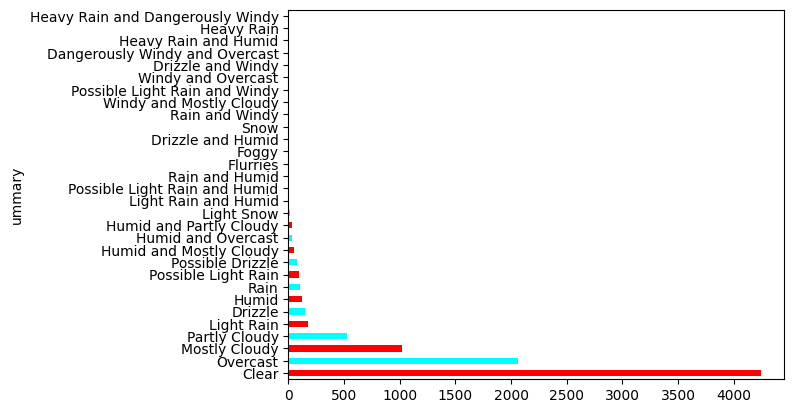

In [87]:
df['ummary'].value_counts().plot(kind="barh", color=["red", "cyan"])

Berikut adalah visualisasi icon menggunakan bar graph.

<Axes: ylabel='icon'>

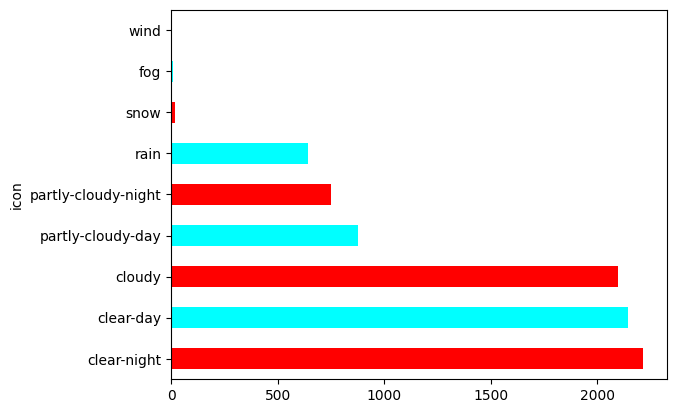

In [88]:
df['icon'].value_counts().plot(kind="barh", color=["red", "cyan"])

**3. MULAI MENGGUNAKAN AI, PAKAI ALGORITMA RANDOM FOREST FORECASTING**

Algoritma Random Forrest menggunakan decision tree, yang dimana decision tree tersebut akan menentukan hasil akhir dari data yang akan kita prediksi. Masing-masing decision tree akan memberikan decision, dan di akhir decision yang paling banyak akan dipilih sebagai hasil prediksi akhir, contoh perumpamaannya bisa dilihat pada gambar di bawah ini.

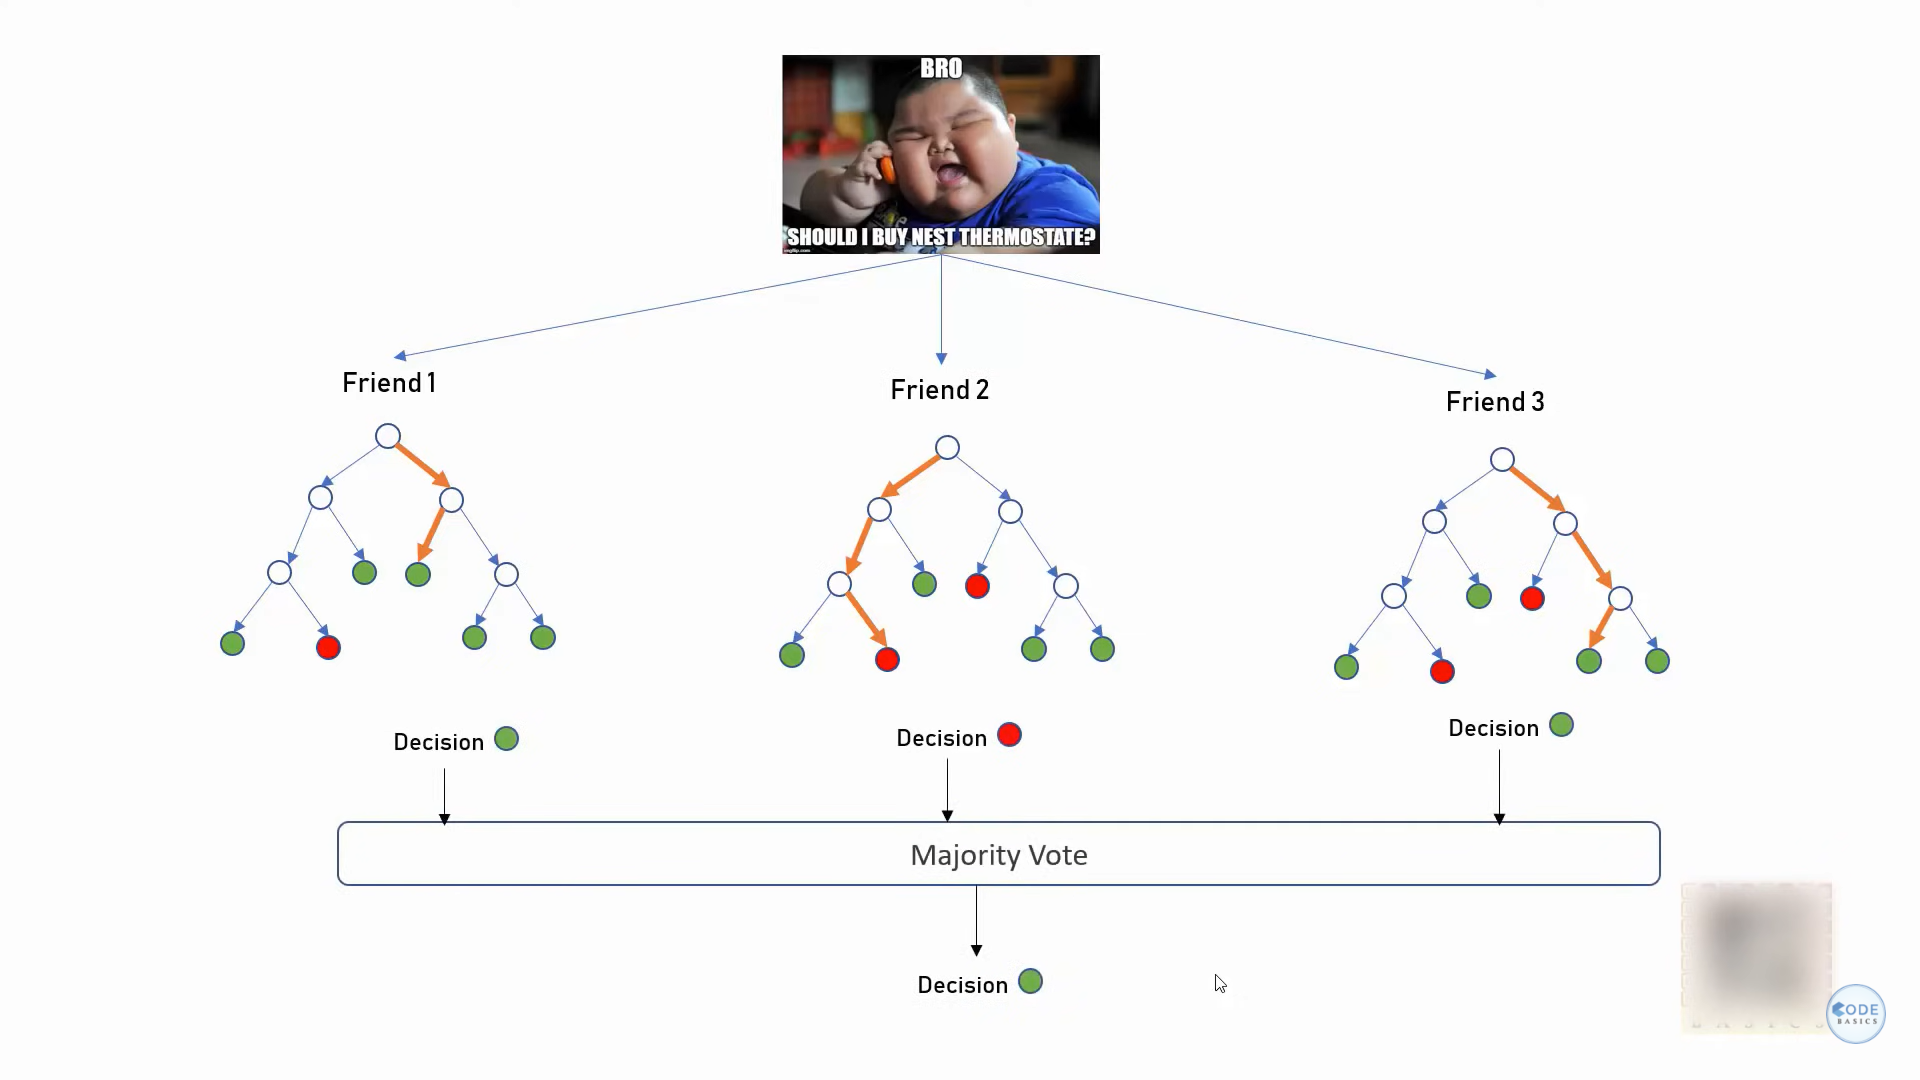

Source: https://www.youtube.com/watch?v=ok2s1vV9XW0

X berguna untuk input data yang akan digunakan, kita akan menggunakan data selain ummary, time, dan icon untuk memprediksi cuaca

y berguna untuk sebagai target dari hal yang ingin kita prediksi

In [89]:
X = df.drop(["ummary", "time", "icon"], axis=1)
y = df["ummary"]

test_size=0.2 untuk melakukan test terhadap 20% dari data keseluruhan, dan untuk training AI menggunakan 80% data keseluruhan.

 random_state=10 untuk menjaga agar urutan data yang di train dan test konsisten, jadi urutannya sama terus tidak teracak setiap kali melakukan algoritma AI. Mirip seperti seed di random number generator.

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

test accuracy dan train accuracy tidak boleh 1.0 karena di AI kalau sampai 1.0 termasuk overfitting, dan prediksi tidak mungkin bisa 1.0 atau 100% akurat.

n_estimator adalah jumlah decision tree yang kita gunakan, kalau disini yaitu 24 decision tree.

confusion matrix untuk mengecek seberapa akurat data kita.

In [92]:
rf = RandomForestClassifier(n_estimators=24, random_state=30)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("test Accuracy:", accuracy)

y_train_pred = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("train Accuracy", train_accuracy)
print()
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

test Accuracy: 0.9908675799086758
train Accuracy 0.999857305936073

Confusion Matrix:
[[842   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  31   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0]
 [  1   0   0  19   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  15   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   6   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   2   0   7   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0  37   0   0   0   0   0   0   0   0   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 208   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 409   0   2   0   0   0   0]
 [  0   0   0 

Berikut adalah grafik perbandingan antara training score dan cross-validation score.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


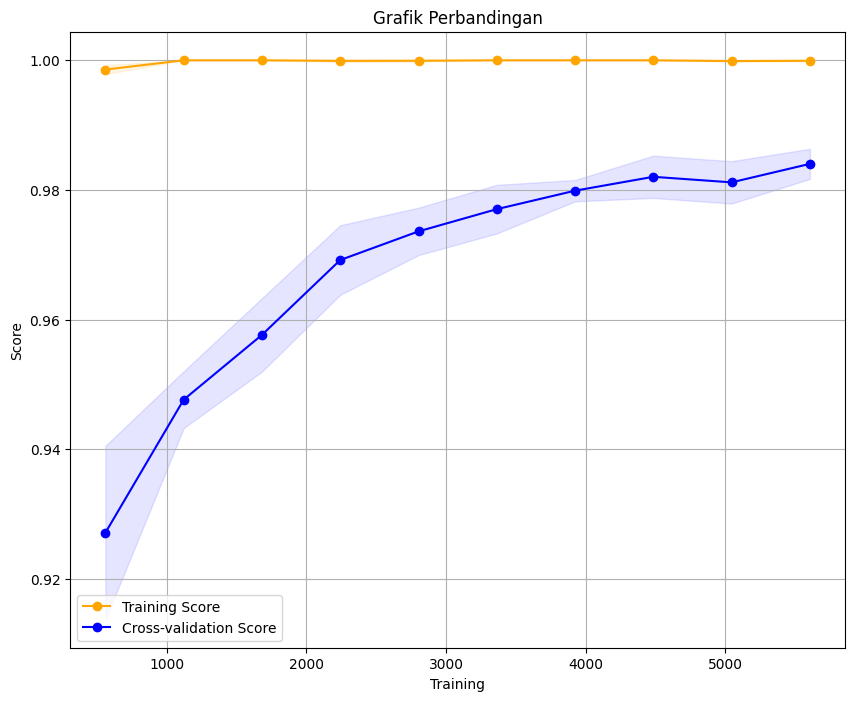

In [93]:
def grafik_perbandingan(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 8))
    plt.title("Grafik Perbandingan")
    plt.xlabel("Training")
    plt.ylabel("Score")
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="orange", label="Training Score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="orange")

    plt.plot(train_sizes, test_scores_mean, 'o-', color="blue", label="Cross-validation Score")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="blue")

    plt.legend(loc="best")
    plt.show()

grafik_perbandingan(rf, X_train, y_train)

Berikut adalah bagian input data dari user untuk memprediksi cuaca berdasarkan dari berbagai input tersebut.


In [94]:
import pandas as pd

time = int(input('Insert time data: '))
precipIntensity = float(input('Insert precipIntensity data: '))
precipProbability = float(input('Insert precipProbability data: '))
temperature = float(input('Insert temperature data: '))
apptemp = float(input('Insert apparentTemperature data: '))
dewpoint = float(input('Insert dewPoint data: '))
humidity = float(input('Insert humidity data: '))
pressure = float(input('Insert pressure data: '))
wind_speed = float(input('Insert windSpeed data: '))
wind_gust = float(input('Insert windGust data: '))
wind_bearing = int(input('Insert windBearing data: '))
cloud_cover = float(input('Insert cloudCover data: '))
uv_index = float(input('Insert uvIndex data: '))
visibility = float(input('Insert visibility data: '))
ozone = float(input('Insert ozone data: '))

input_data = {
    "time": time,
    "precipIntensity": precipIntensity,
    "precipProbability": precipProbability,
    "temperature": temperature,
    "apptemp": apptemp,
    "dewpoint": dewpoint,
    "humidity": humidity,
    "pressure": pressure,
    "wind_speed": wind_speed,
    "wind_gust": wind_gust,
    "wind_bearing": wind_bearing,
    "cloud_cover": cloud_cover,
    "uv_index": uv_index,
    "visibility": visibility,
    "ozone": ozone
}

df_input_user = pd.DataFrame(input_data, index=[0])
x_input_user = df_input_user.drop(["time"], axis=1)
time_user = df_input_user['time']
pred_input_user = rf.predict(x_input_user)

print('Hasil prediksi cuaca adalah: ' + pred_input_user[0])


Insert time data: 1595000000
Insert precipIntensity data: 0
Insert precipProbability data: 0
Insert temperature data: 90
Insert apparentTemperature data: 90
Insert dewPoint data: 2
Insert humidity data: 1
Insert pressure data: 1020
Insert windSpeed data: 1
Insert windGust data: 1
Insert windBearing data: 12
Insert cloudCover data: 312
Insert uvIndex data: 1
Insert visibility data: 4
Insert ozone data: 200
Hasil prediksi cuaca adalah: Overcast


Hasil prediksi nya Overcast untuk input tersebut.